In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Extraction
xgdata=pd.read_sql_query("""SELECT * FROM XG where tour_id ='isl7';""", conn)

In [4]:
#Data Cleaning
for i in range(len(xgdata)):
    if ((xgdata.iloc[i,1]==3) | (xgdata.iloc[i,1]==31) | (xgdata.iloc[i,1]==36) | (xgdata.iloc[i,1]==41) | (xgdata.iloc[i,1]==48)):
        if xgdata.iloc[i,5]=="Deshorn Brown":
            xgdata.iloc[i,8]='BFC'
    elif xgdata.iloc[i,1]==108:
        if xgdata.iloc[i,5]=="Aaron Amadi Holloway":
            xgdata.iloc[i,8]='SCEB'
            xgdata.iloc[i,4]='345'
    elif xgdata.iloc[i,1]==56:
        if xgdata.iloc[i,5]==" Parag Srivas":
            xgdata.iloc[i,8]='BFC'
            xgdata.iloc[i,4]='123'

In [5]:
global KBFC,ATKMB,MCFC,CFC,FCG,NEUFC,OFC,HFC,SCEB,BFC,JFC
KBFC=0
ATKMB=0
MCFC=0
CFC=0
FCG=0
NEUFC=0
OFC=0
HFC=0
SCEB=0
BFC=0
JFC=0
for mno in xgdata["match_no"].unique().astype(int):
    Team1 = []
    Team2 = []
    xgmatch=xgdata.loc[xgdata["match_no"]==mno]
    teams=list(xgmatch["team_name"].unique())
    flag=0
    for i in range(len(xgmatch)):
        if len(teams)>1:
            if xgmatch.iloc[i,8] == teams[0]:
                Team1.append(xgmatch.iloc[i,65])
            elif xgmatch.iloc[i,8] == teams[1]:
                Team2.append(xgmatch.iloc[i, 65])
        else:
            if xgmatch.iloc[i,8] == teams[0]:
                Team1.append(xgmatch.iloc[i,65])
                Team2=[0]
                flag=1
        # Team1=[0.5]
        # Team2=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

    def CalculateChance(team1, team2):
        global KBFC,ATKMB,MCFC,CFC,FCG,NEUFC,OFC,HFC,SCEB,BFC,JFC

        home = 0
        away = 0
        draw = 0

        def calculateWinner(home, away):
            #Our match starts at 0-0
            HomeGoals = 0
            AwayGoals = 0

            #We have a function within our function
            #This one runs the '.random()' test above for a list
            def testShots(shots):

                #Start goal count at 0
                Goals = 0

                #For each shot, if it goes in, add a goal
                for shot in shots:
                    if random.random() <= shot:
                        Goals += 1

                #Finally, return the number of goals
                return Goals

            #Run the above formula for home and away lists
            HomeGoals = testShots(home)
            AwayGoals = testShots(away)

            #Return the score
            if HomeGoals > AwayGoals:
                return "home"
            elif AwayGoals > HomeGoals:
                return "away"
            else:
                return "draw"

        for i in range(0,10000):
            matchWinner = calculateWinner(team1,team2)
            if matchWinner == "home":
                home +=1
            elif matchWinner == "away":
                away +=1
            else:
                draw +=1

        homepts = home*3 + draw
        awaypts = away*3 + draw
            
        if teams[0]=="KBFC":
                KBFC=KBFC+homepts/10000
        elif teams[0]=="ATKMB":
                ATKMB+=homepts/10000
        elif teams[0]=="MCFC":
                MCFC+=homepts/10000
        elif teams[0]=="NEUFC":
                NEUFC+=homepts/10000
        elif teams[0]=="BFC":
                BFC+=homepts/10000
        elif teams[0]=="FCG":
                FCG+=homepts/10000
        elif teams[0]=="HFC":
                HFC+=homepts/10000
        elif teams[0]=="OFC":
                OFC+=homepts/10000
        elif teams[0]=="CFC":
                CFC+=homepts/10000
        elif teams[0]=="JFC":
                JFC+=homepts/10000
        elif teams[0]=="SCEB":
                SCEB+=homepts/10000
        
        if flag!=1:
            if teams[1]=="KBFC":
                    KBFC=KBFC+awaypts/10000
            elif teams[1]=="ATKMB":
                    ATKMB+=awaypts/10000
            elif teams[1]=="MCFC":
                    MCFC+=awaypts/10000
            elif teams[1]=="NEUFC":
                    NEUFC+=awaypts/10000
            elif teams[1]=="BFC":
                    BFC+=awaypts/10000
            elif teams[1]=="FCG":
                    FCG+=awaypts/10000
            elif teams[1]=="HFC":
                    HFC+=awaypts/10000
            elif teams[1]=="OFC":
                    OFC+=awaypts/10000
            elif teams[1]=="CFC":
                    CFC+=awaypts/10000
            elif teams[1]=="JFC":
                    JFC+=awaypts/10000
            elif teams[1]=="SCEB":
                    SCEB+=awaypts/10000

    CalculateChance(Team1, Team2)

In [6]:
print("\n Expected Points :")
print("\n KBFC :" + str(int(KBFC)))
print("\n ATKMB :" + str(int(ATKMB)))
print("\n NEUFC :" + str(int(NEUFC)))
print("\n BFC :" + str(int(BFC)))
print("\n SCEB :" + str(int(SCEB)))
print("\n OFC :" + str(int(OFC)))
print("\n JFC :" + str(int(JFC)))
print("\n HFC :" + str(int(HFC)))
print("\n CFC :" + str(int(CFC)))
print("\n MCFC :" + str(int(MCFC)))
print("\n FCG :" + str(int(FCG)))


 Expected Points :

 KBFC :25

 ATKMB :34

 NEUFC :35

 BFC :23

 SCEB :19

 OFC :13

 JFC :26

 HFC :34

 CFC :29

 MCFC :38

 FCG :26


In [7]:
# xP=pd.DataFrame({"Team":["KBFC","ATKMB","NEUFC","BFC","SCEB","OFC","JFC","HFC","CFC","MCFC","FCG"],"Expected Points":[str(int(KBFC)),str(int(ATKMB)),str(int(NEUFC)),str(int(BFC)),str(int(SCEB)),str(int(OFC)),str(int(JFC)),str(int(HFC)),str(int(CFC)),str(int(MCFC),str(int(FCG))],"Actual Points":["17","40","33","22","17","12","27","29","20","40","31"]})
xP=pd.DataFrame({"Team":["KBFC","ATKMB","NEUFC","BFC","SCEB","OFC","JFC","HFC","CFC","MCFC","FCG"],"Expected Points":[KBFC,ATKMB,NEUFC,BFC,SCEB,OFC,JFC,HFC,CFC,MCFC,FCG],"Actual Points":[17,40,33,22,17,12,27,29,20,40,31]})
xP.to_excel("D:\\work\\work@sportskpi\\isl7\\xP.xlsx")
xP

,Team,Expected Points,Actual Points
0,KBFC,25.3979,17
1,ATKMB,34.1547,40
2,NEUFC,35.8017,33
3,BFC,23.5334,22
4,SCEB,19.3232,17
5,OFC,13.6163,12
6,JFC,26.3665,27
7,HFC,34.6043,29
8,CFC,29.6459,20
9,MCFC,38.9577,40


C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


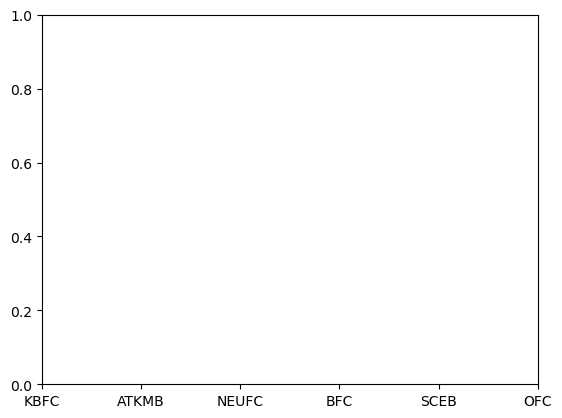

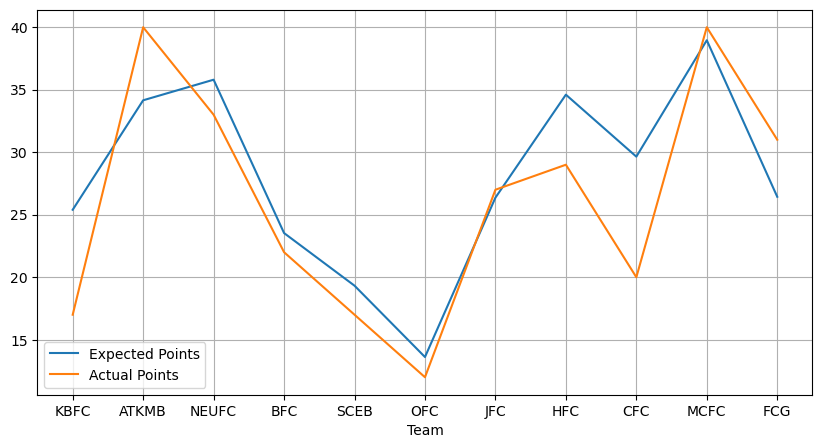

In [8]:
fig, ax = plt.subplots()
fig=xP.plot(x="Team",y=["Expected Points","Actual Points"],figsize=(10,5),grid=True,xticks=xP.index)
ax.set_xticklabels(xP["Team"])
plt.show()